In [9]:
from qiskit.quantum_info import Statevector, DensityMatrix
import numpy as np

psi0 = Statevector.from_label('0')
psi_plus = Statevector([1/np.sqrt(2),1/np.sqrt(2)])

rho0 = DensityMatrix(psi0)
rho_plus = DensityMatrix(psi_plus)

Bit Flipping Channel

In [13]:
from qiskit.quantum_info import Kraus

def bit_flip_channel(p):
    K0 = np.sqrt(1-p) * np.eye(2)
    K1 = np.sqrt(p)*np.array([[0,1],[1,0]]) #This is sqrt(p).pauli-x gate
    return Kraus([K0,K1])
    

channel = bit_flip_channel(0.2)

rho_noisy = rho_plus.evolve(channel)

print(rho_noisy)

print(rho_plus)
    

DensityMatrix([[0.5+0.j, 0.5+0.j],
               [0.5+0.j, 0.5+0.j]],
              dims=(2,))
DensityMatrix([[0.5+0.j, 0.5+0.j],
               [0.5+0.j, 0.5+0.j]],
              dims=(2,))


In [15]:
from qiskit.quantum_info import state_fidelity

fid = state_fidelity(rho_plus, rho_noisy)

print(fid)

0.9999999999999998


Plot Fidelity

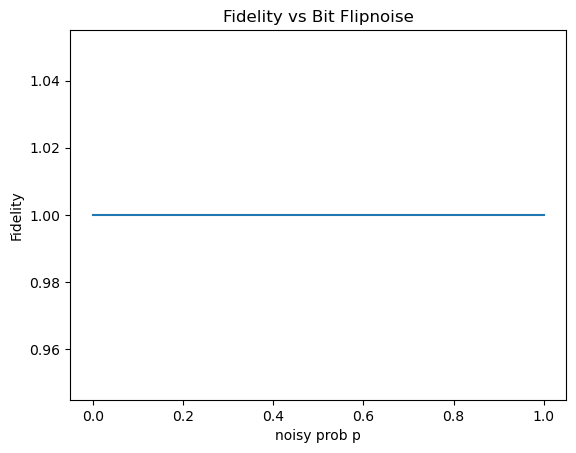

In [19]:
import matplotlib.pyplot as plt

ps = np.linspace(0,1,20)
fids = []

for p in ps:
    channel = bit_flip_channel(p)
    rho_noisy = rho_plus.evolve(channel)
    fids.append(state_fidelity(rho_plus,rho_noisy))

plt.plot(ps, fids)
plt.xlabel("noisy prob p")
plt.ylabel("Fidelity")
plt.title("Fidelity vs Bit Flipnoise")
plt.show()

In [40]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix
from qiskit_aer.noise import NoiseModel, depolarizing_error
import numpy as np
import matplotlib as mpl


# Create quantum circuit
qc = QuantumCircuit(1)
qc.h(0) #This prepares |+> state
qc.save_density_matrix()


print(qc.draw('text'))

p = 0.2

#Noise_error
error = depolarizing_error(p, 1)
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error, ['h'])





   ┌───┐ density_matrix 
q: ┤ H ├───────░────────
   └───┘       ░        


Simulate the noisy circuit

In [50]:
from qiskit_aer import Aer


backend = Aer.get_backend('aer_simulator_density_matrix')

result = backend.run(qc, noise_model = noise_model).result()

rho_circuit = result.data(0)['density_matrix']

#extracting the circuit
rho_circuit = DensityMatrix(rho_circuit)



rho_circuit


DensityMatrix([[0.5+0.j, 0.4+0.j],
               [0.4+0.j, 0.5+0.j]],
              dims=(2,))


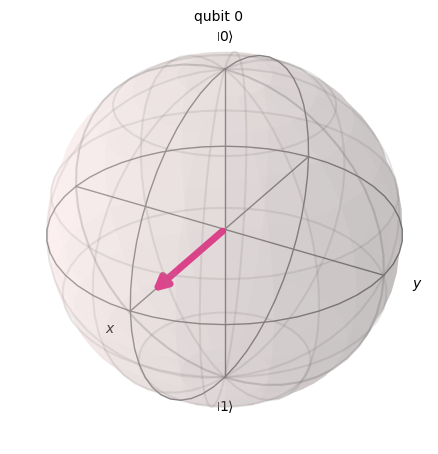

In [46]:
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(rho_circuit)

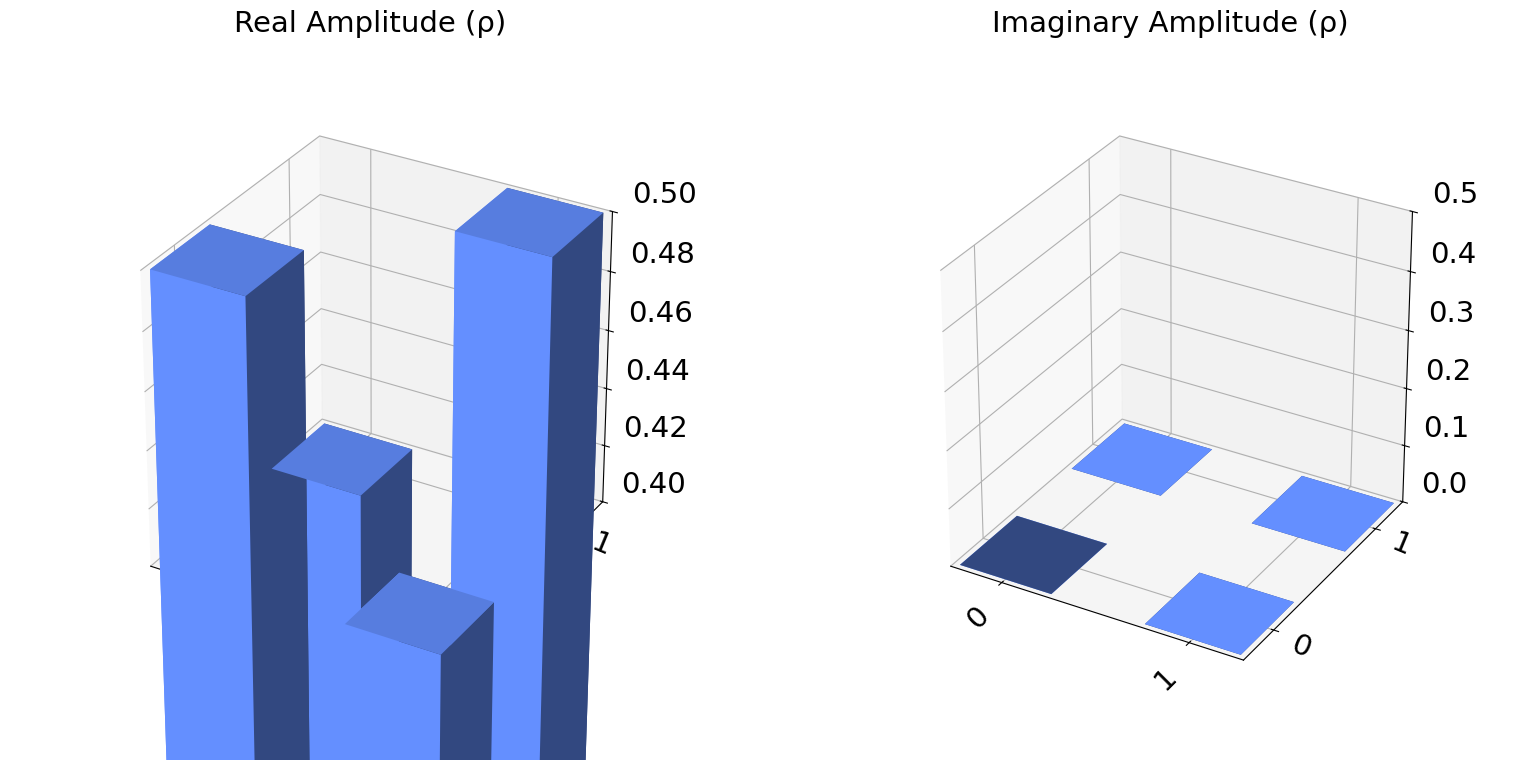

In [48]:
from qiskit.visualization import plot_state_city

plot_state_city(rho_circuit)